In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nba =pd.read_csv('nba.csv')
nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [3]:
nba['Height'] = nba['Height'].str.replace('-','.').astype('float')
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6.2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6.6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6.5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6.5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6.1,231.0,NaN,5000000.0


In [4]:
nba.dropna(inplace=True)

In [5]:
nba.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [6]:
nba.describe()

,Number,Age,Height,Weight,Salary
count,364.000000,364.000000,364.000000,364.000000,3.640000e+02
mean,16.829670,26.615385,6.509670,219.785714,4.620311e+06
std,14.994162,4.233591,0.340204,24.793099,5.119716e+06
min,0.000000,19.000000,5.110000,161.000000,5.572200e+04
25%,5.000000,24.000000,6.200000,200.000000,1.000000e+06
50%,12.000000,26.000000,6.550000,220.000000,2.515440e+06
75%,25.000000,29.000000,6.800000,240.000000,6.149694e+06
max,99.000000,40.000000,7.200000,279.000000,2.287500e+07


## Basic Command : plt.hist()

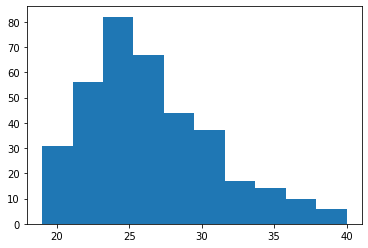

In [7]:
plt.hist(nba['Age'])
plt.show()

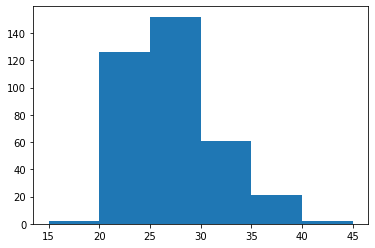

In [8]:
plt.hist(nba['Age'], bins=[15,20,25,30,35,40,45])
plt.show()

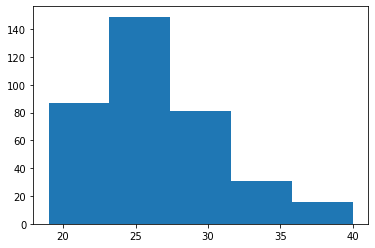

In [9]:
bins = np.linspace(19,40,6)
plt.hist(nba['Age'], bins=bins)
plt.show()

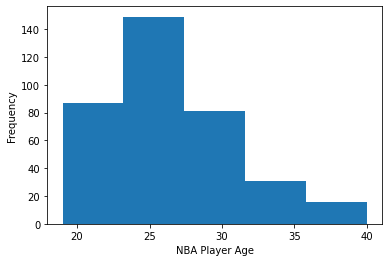

In [10]:
plt.hist(nba['Age'], bins=5)
plt.xlabel('NBA Player Age')
plt.ylabel('Frequency')
plt.savefig('nba_age_dist.jpg')
plt.show()

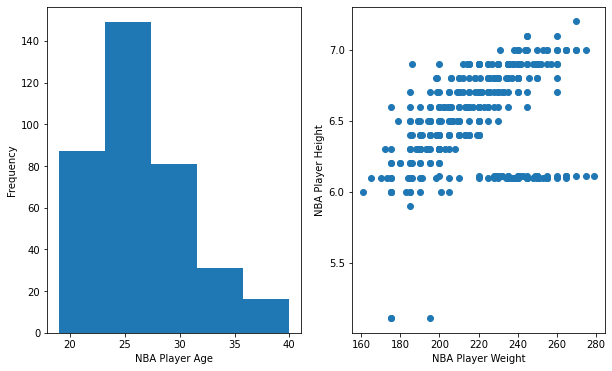

In [11]:
fig, [ax1,ax2] = plt.subplots(1,2)
fig.set_size_inches(10,6)
ax1.hist(nba['Age'], bins=5)
ax1.set_xlabel('NBA Player Age')
ax1.set_ylabel('Frequency')

ax2.scatter(nba['Weight'], nba['Height'])
ax2.set_xlabel('NBA Player Weight')
ax2.set_ylabel('NBA Player Height')

plt.show()

## SEABORN

C:\Users\Andisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


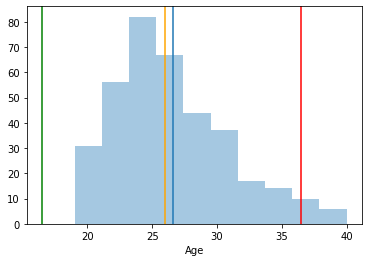

In [12]:
iqr = nba['Age'].quantile(0.75) - nba['Age'].quantile(0.25)
upper_whis = nba['Age'].quantile(0.75) + (1.5*iqr)
lower_whis = nba['Age'].quantile(0.25) - (1.5*iqr)

sns.distplot(nba['Age'], bins=10, kde=False) #kde=False, untuk menghilangkan garis tengahnya
plt.axvline(nba['Age'].mean())
plt.axvline(nba['Age'].median(), color='orange')

plt.axvline(upper_whis, color='red')
plt.axvline(lower_whis, color='green')

plt.show()


In [13]:
nba[nba['Age']>upper_whis]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
101,Paul Pierce,Los Angeles Clippers,34.0,SF,38.0,6.70,235.0,Kansas,3376000.0
256,Jason Terry,Houston Rockets,31.0,SG,38.0,6.20,185.0,Arizona,947276.0
259,Chris Andersen,Memphis Grizzlies,7.0,PF,37.0,6.10,245.0,Blinn College,5000000.0
261,Vince Carter,Memphis Grizzlies,15.0,SG,39.0,6.60,220.0,North Carolina,4088019.0
298,Tim Duncan,San Antonio Spurs,21.0,C,40.0,6.11,250.0,Wake Forest,5250000.0
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6.30,200.0,Utah,250750.0
420,Nazr Mohammed,Oklahoma City Thunder,13.0,C,38.0,6.10,250.0,Kentucky,222888.0


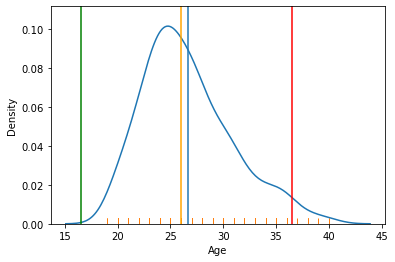

In [17]:
iqr = nba['Age'].quantile(0.75) - nba['Age'].quantile(0.25)
upper_whis = nba['Age'].quantile(0.75) + (1.5*iqr)
lower_whis = nba['Age'].quantile(0.25) - (1.5*iqr)

sns.kdeplot(nba['Age'])
sns.rugplot(nba['Age']) #memunculkan garis bantu yang ada di bawah... bisa lihat hasil
plt.axvline(nba['Age'].mean())
plt.axvline(nba['Age'].median(), color='orange')

plt.axvline(upper_whis, color='red')
plt.axvline(lower_whis, color='green')

plt.show()


In [21]:
np.random.seed(24)
x_empiric=np.sort(nba['Age'])
y_empiric=np.arange(1,len(x_empiric)+1)/len(x_empiric)

x_theo = np.sort(np.random.normal(nba['Age'].mean(),nba['Age'].std(ddof=0),10000))
y_theo=np.arange(1,len(x_theo)+1)/len(x_theo)

## ddof = 0 (sampel)
## ddof = 1 (populasi)